In [29]:
import pandas as pd

drive_dist = pd.read_csv('Data/drive-dist-PGA25.csv')
fairways_hit = pd.read_csv('Data/fairways-hit-pct-PGA25.csv')
scoring_avg = pd.read_csv('Data/scoring-avg-PGA25.csv')
gir_pct = pd.read_csv('Data/GIR-pct-PGA25.csv')
scramble_pct = pd.read_csv('Data/scramble-pct-PGA25.csv')
putts = pd.read_csv('Data/putts-per-round-PGA25.csv')

# Merge datasets (adjust the key column name as needed)
df = pd.merge(drive_dist, fairways_hit, on='PLAYER_ID', how='left')

merged_df = pd.concat([drive_dist[['PLAYER_ID', 'AVG']], fairways_hit[['PLAYER_ID', '%']]], axis=1)

merged_df = pd.merge(
    drive_dist[['PLAYER_ID', 'AVG', 'PLAYER']].rename(columns={'AVG': 'drive_avg'}),
    fairways_hit[['PLAYER_ID', '%']].rename(columns={'%': 'fairways_pct'}),
    on='PLAYER_ID',
    how='inner'
)

merged_df = pd.merge(
    merged_df,
    gir_pct[['PLAYER_ID', '%']].rename(columns={'%': 'gir_pct'}),
    on='PLAYER_ID',
    how='inner'
)

merged_df = pd.merge(
    merged_df,
    scramble_pct[['PLAYER_ID', '%']].rename(columns={'%': 'scramble_pct'}),
    on='PLAYER_ID',
    how='inner'
)

merged_df = pd.merge(
    merged_df,
    putts[['PLAYER_ID', 'AVG']].rename(columns={'AVG': 'putts_avg'}),
    on='PLAYER_ID',
    how='inner'
)

merged_df = pd.merge(
    merged_df,
    scoring_avg[['PLAYER_ID', 'AVG']].rename(columns={'AVG': 'scoring_avg'}),
    on='PLAYER_ID',
    how='inner'
)

# Assuming the scoring column is named 'SCORING_AVG' (adjust if needed)
merged_df = merged_df.sort_values(by='scoring_avg', ascending=True)
print(merged_df)





     PLAYER_ID  drive_avg             PLAYER fairways_pct gir_pct  \
78       46046      302.0  Scottie Scheffler       65.31%  71.45%   
2        28237      317.5       Rory McIlroy       51.81%  67.13%   
65       34021      303.8         Bud Cauley       56.36%  67.96%   
137      49960      295.6        Sepp Straka       67.27%  72.10%   
82       33968      301.4   Thorbjørn Olesen       61.57%  68.89%   
..         ...        ...                ...          ...     ...   
127      39977      297.0           Max Homa       56.48%  60.70%   
91       32070      300.6      Rafael Campos       50.65%  60.43%   
160      45523      292.8  Thriston Lawrence       61.19%  62.88%   
132      34466      296.9      Peter Malnati       47.22%  57.58%   
144      23320      294.8        Ryan Palmer       54.58%  60.26%   

    scramble_pct  putts_avg  scoring_avg  
78        71.35%      28.08       69.019  
2         69.01%      27.96       69.163  
65        65.90%      28.40       70.014  

In [35]:
# Change percentages to floats for data analysis
merged_df['fairways_pct'] = merged_df['fairways_pct'].str.rstrip('%').astype(float)
merged_df['gir_pct'] = merged_df['gir_pct'].str.rstrip('%').astype(float)
merged_df['scramble_pct'] = merged_df['scramble_pct'].str.rstrip('%').astype(float)


In [36]:
print(merged_df[['scoring_avg', 'drive_avg', 'fairways_pct', 'gir_pct', 'scramble_pct', 'putts_avg' ]].describe())

       scoring_avg   drive_avg  fairways_pct     gir_pct  scramble_pct  \
count   185.000000  185.000000    185.000000  185.000000    185.000000   
mean     71.332432  300.458919     57.873189   65.860486     60.954108   
std       0.709698    7.896473      5.396965    2.971631      4.110596   
min      69.019000  275.400000     42.210000   57.580000     49.180000   
25%      70.904000  295.500000     54.070000   63.800000     58.500000   
50%      71.227000  300.500000     57.840000   66.070000     61.060000   
75%      71.674000  305.400000     61.460000   67.960000     63.730000   
max      73.405000  323.900000     72.840000   73.380000     71.350000   

        putts_avg  
count  185.000000  
mean    28.698595  
std      0.563622  
min     27.490000  
25%     28.290000  
50%     28.680000  
75%     29.100000  
max     30.500000  
PLAYER_ID         int64
drive_avg       float64
PLAYER           object
fairways_pct    float64
gir_pct         float64
scramble_pct    float64
putts_avg

In [39]:
grouped = merged_df.groupby('scoring_avg')[['drive_avg', 'fairways_pct', 'gir_pct', 'scramble_pct', 'putts_avg']].mean()

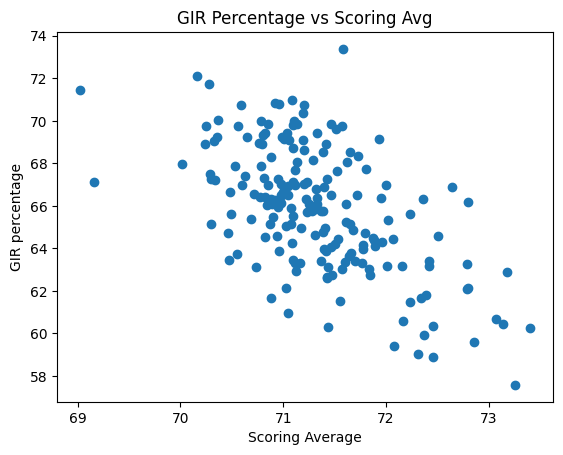

In [95]:
import matplotlib.pyplot as plt

plt.scatter(merged_df['scoring_avg'], merged_df['gir_pct'])
plt.xlabel('Scoring Average')
plt.ylabel('GIR percentage')
plt.title('GIR Percentage vs Scoring Avg')
plt.show()


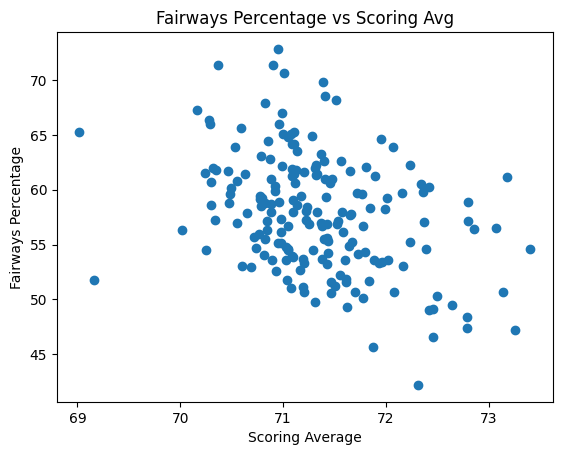

In [96]:
import matplotlib.pyplot as plt

plt.scatter(merged_df['scoring_avg'], merged_df['fairways_pct'])
plt.xlabel('Scoring Average')
plt.ylabel('Fairways Percentage')
plt.title('Fairways Percentage vs Scoring Avg')
plt.show()


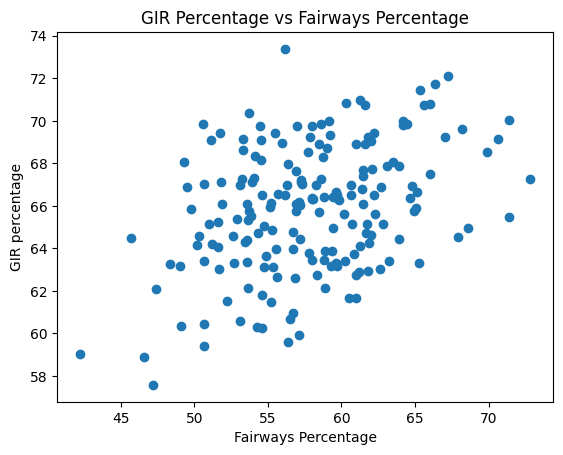

In [97]:
import matplotlib.pyplot as plt

plt.scatter(merged_df['fairways_pct'], merged_df['gir_pct'])
plt.xlabel('Fairways Percentage')
plt.ylabel('GIR percentage')
plt.title('GIR Percentage vs Fairways Percentage')
plt.show()


In [48]:
correlations = merged_df.corr(numeric_only=True)
print(correlations['scoring_avg'].sort_values())


gir_pct        -0.584877
scramble_pct   -0.496924
fairways_pct   -0.374872
drive_avg      -0.116542
PLAYER_ID       0.081505
putts_avg       0.200146
scoring_avg     1.000000
Name: scoring_avg, dtype: float64


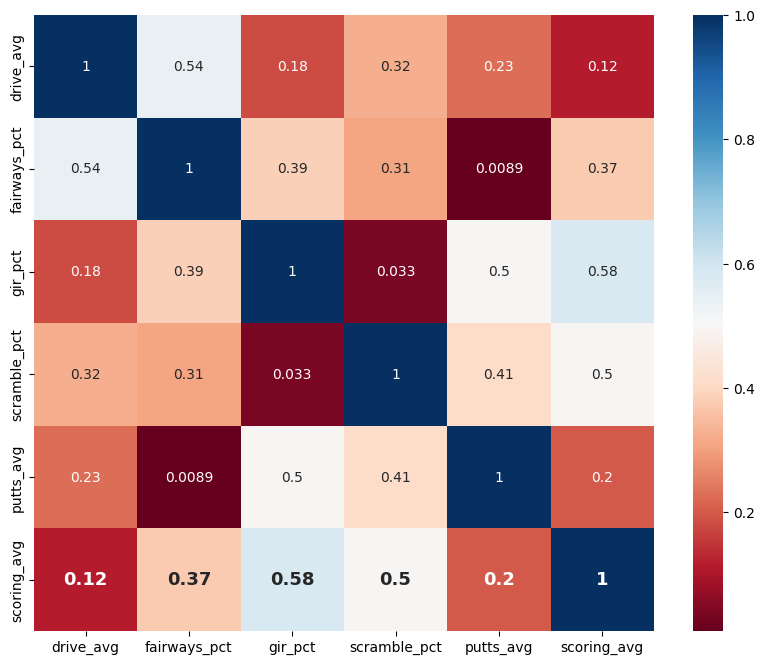

In [93]:
import seaborn as sns
plt.figure(figsize=(10, 8))

ax = sns.heatmap(correlations, cmap='RdBu', annot=True)

for text in ax.texts:
    # text.get_position() returns (x, y)
    x, y = text.get_position()
    # Get the row label for current y position
    row_label = correlations.index[int(y)]
    
    if row_label == 'scoring_avg':
        text.set_fontweight('bold')
        text.set_size(12)

plt.show()